<a href="https://colab.research.google.com/github/Victor17in/Alura/blob/main/Python/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os nomes

In [2]:
import pandas as pd

In [6]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [8]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [9]:
frames = [nomes_f, nomes_m]

In [10]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [14]:
nomes = pd.concat(frames)['nome'].to_frame()

In [18]:
nomes.sample(5)

,nome
179,LILIANE
8,LUIZ
4,CARLOS
176,MARA
78,WILSON


# Incluindo ID dos alunos

In [20]:
import numpy as np
np.random.seed(123)

In [21]:
total_alunos = len(nomes)
total_alunos

400

In [24]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [26]:
nomes.sample(5)

,nome,id_aluno
92,DIOGO,23
166,KELLY,171
98,THAIS,366
142,HUGO,150
184,MARILIA,272


In [28]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [30]:
nomes.sample(5)

,nome,id_aluno,dominio
63,MIGUEL,18,@dominiodoemail.com.br
185,SHEILA,392,@dominiodoemail.com.br
144,LORENA,374,@servicodoemail.com
120,EDILSON,293,@servicodoemail.com
101,GISELE,227,@servicodoemail.com


In [33]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [34]:
nomes.sample(5)

,nome,id_aluno,dominio,email
75,NELSON,57,@dominiodoemail.com.br,nelson@dominiodoemail.com.br
18,RAIMUNDO,238,@servicodoemail.com,raimundo@servicodoemail.com
120,JOSIANE,138,@servicodoemail.com,josiane@servicodoemail.com
74,ALAN,379,@dominiodoemail.com.br,alan@dominiodoemail.com.br
71,MARTA,26,@dominiodoemail.com.br,marta@dominiodoemail.com.br


# Criando a tabela Cursos

In [36]:
!pip3 install html5lib
!pip3 install lxml

In [38]:
import html5lib

In [41]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos =pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [42]:
type(cursos)

list

In [44]:
cursos = cursos[0]

In [45]:
type(cursos)

pandas.core.frame.DataFrame

In [47]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [50]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [51]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [52]:
cursos['id'] = cursos.index + 1

In [53]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [54]:
cursos = cursos.set_index('id')

In [56]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [57]:
nomes.sample(5)

,nome,id_aluno,dominio,email
15,LETICIA,83,@servicodoemail.com,leticia@servicodoemail.com
167,ANGELO,364,@dominiodoemail.com.br,angelo@dominiodoemail.com.br
165,ISAIAS,108,@dominiodoemail.com.br,isaias@dominiodoemail.com.br
168,IARA,251,@dominiodoemail.com.br,iara@dominiodoemail.com.br
180,LIDIA,62,@servicodoemail.com,lidia@servicodoemail.com


In [66]:
nomes['matrículas'] = np.ceil(np.random.exponential(size=total_alunos)* 1.5).astype(int)

In [69]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matrículas
28,LEANDRO,45,@servicodoemail.com,leandro@servicodoemail.com,1
170,MARINALVA,204,@dominiodoemail.com.br,marinalva@dominiodoemail.com.br,1
1,JOAO,296,@dominiodoemail.com.br,joao@dominiodoemail.com.br,2
155,EMANUEL,17,@dominiodoemail.com.br,emanuel@dominiodoemail.com.br,2
98,THAIS,366,@servicodoemail.com,thais@servicodoemail.com,1


In [71]:
nomes.matrículas.describe()

count    400.000000
mean       1.970000
std        1.443714
min        1.000000
25%        1.000000
50%        1.500000
75%        2.000000
max       14.000000
Name: matrículas, dtype: float64

In [72]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


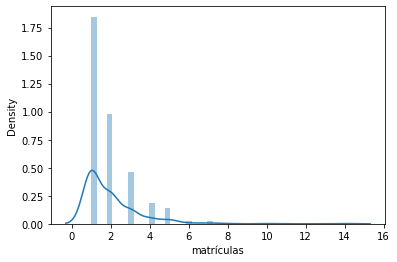

In [74]:
sns.distplot(nomes.matrículas)

In [75]:
nomes.matrículas.value_counts()

1     200
2     106
3      50
4      20
5      15
7       3
6       3
14      1
10      1
8       1
Name: matrículas, dtype: int64

In [76]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matrículas
159,ARNALDO,101,@dominiodoemail.com.br,arnaldo@dominiodoemail.com.br,10
101,SILVIO,243,@dominiodoemail.com.br,silvio@dominiodoemail.com.br,4
187,ELTON,309,@servicodoemail.com,elton@servicodoemail.com,1
183,IRACI,294,@servicodoemail.com,iraci@servicodoemail.com,8
151,SEVERINA,320,@servicodoemail.com,severina@servicodoemail.com,2


# Selcionando cursos

In [77]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matrículas
123,EVANDRO,231,@dominiodoemail.com.br,evandro@dominiodoemail.com.br,1
41,CLAUDIO,192,@dominiodoemail.com.br,claudio@dominiodoemail.com.br,1
161,DAMIAO,363,@dominiodoemail.com.br,damiao@dominiodoemail.com.br,1


In [81]:
todas_matrículas = []
x = np.random.rand(20)
prob = x/ sum(x)

In [83]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matrículas = row.matrículas
  for i in range(matrículas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matrículas.append(mat)

matrículas = pd.DataFrame(todas_matrículas, columns = ['id_aluno', 'id_curso'])

In [84]:
matrículas.head()

,id_aluno,id_curso
0,47,17
1,160,17
2,160,14
3,160,12
4,160,19


In [88]:
matrículas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,55,Lógica de programação
2,75,Java para Web
3,7,C# para Web
4,33,Ruby on Rails
5,75,Cursos de Python
6,46,PHP com MySql
7,18,.NET para web
8,15,Novas integrações com Java
9,75,TDD com Java


In [89]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matrículas
179,IAGO,346,@dominiodoemail.com.br,iago@dominiodoemail.com.br,1
57,IGOR,201,@dominiodoemail.com.br,igor@dominiodoemail.com.br,2
179,LILIANE,162,@dominiodoemail.com.br,liliane@dominiodoemail.com.br,1


In [90]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [91]:
matrículas.head()

,id_aluno,id_curso
0,47,17
1,160,17
2,160,14
3,160,12
4,160,19


In [92]:
matrículas_por_curso = matrículas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

In [94]:
matrículas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,55,Lógica de programação
2,75,Java para Web
3,7,C# para Web
4,33,Ruby on Rails
5,75,Cursos de Python


# Saída em diferentes formatos

In [95]:
matrículas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,55,Lógica de programação
2,75,Java para Web
3,7,C# para Web


In [96]:
matrículas_por_curso.to_csv('matrículas_por_curso.csv', index = False)

In [98]:
pd.read_csv('matrículas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,55,Lógica de programação
1,75,Java para Web
2,7,C# para Web
3,33,Ruby on Rails
4,75,Cursos de Python
5,46,PHP com MySql
6,18,.NET para web
7,15,Novas integrações com Java
8,75,TDD com Java
9,36,Código limpo com C#


In [99]:
matrículas_json = matrículas_por_curso.to_json()

In [100]:
matrículas_json

'{"quantidade_de_alunos":{"1":55,"2":75,"3":7,"4":33,"5":75,"6":46,"7":18,"8":15,"9":75,"10":36,"11":38,"12":70,"13":12,"14":65,"15":7,"16":13,"17":77,"18":6,"19":48,"20":17},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [101]:
matrículas_html = matrículas_por_curso.to_html()

In [102]:
matrículas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>55</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>75</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>7</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>33</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>75</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>46</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>18</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>15</td>\n      <td>Novas integrações com Java</td>\n 

In [103]:
print(matrículas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>55</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>75</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>7</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>33</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>75</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>46</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>18</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>15</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>75</td>
 

# Criando o banco sql

In [104]:
!pip install sqlalchemy

In [105]:
from sqlalchemy import create_engine, MetaData, Table

In [107]:
engine = create_engine('sqlite:///:memory:')

In [108]:
engine

Engine(sqlite:///:memory:)

In [109]:
type(engine)

sqlalchemy.engine.base.Engine

In [111]:
matrículas_por_curso.to_sql('matrículas', engine)

In [112]:
print(engine.table_names())

['matrículas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando do banco sql

In [113]:
query = 'select * from matrículas where quantidade_de_alunos < 20'

In [114]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,7,C# para Web
1,7,18,.NET para web
2,8,15,Novas integrações com Java
3,13,12,Persistência com .NET
4,15,7,Análise de dados
5,16,13,Estatística básica
6,18,6,Programação funcional
7,20,17,Orientação objetos com Java


In [115]:
pd.read_sql_table('matrículas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,55
1,Java para Web,75
2,C# para Web,7
3,Ruby on Rails,33
4,Cursos de Python,75
5,PHP com MySql,46
6,.NET para web,18
7,Novas integrações com Java,15
8,TDD com Java,75
9,Código limpo com C#,36


In [116]:
muitas_matrículas = pd.read_sql_table('matrículas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [117]:
muitas_matrículas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,55
1,Java para Web,75
2,C# para Web,7
3,Ruby on Rails,33
4,Cursos de Python,75
5,PHP com MySql,46
6,.NET para web,18
7,Novas integrações com Java,15
8,TDD com Java,75
9,Código limpo com C#,36


In [120]:
muitas_matrículas = muitas_matrículas.query('quantidade_de_alunos > 70')

In [121]:
muitas_matrículas

,nome_do_curso,quantidade_de_alunos
1,Java para Web,75
4,Cursos de Python,75
8,TDD com Java,75
16,Internet das coisas,77


# Escrevendo no banco

In [122]:
muitas_matrículas.to_sql('muitas_matrículas', con=engine)

In [123]:
print(engine.table_names())

['matrículas', 'muitas_matrículas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos e alunas da próxima turma

In [124]:
matrículas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,55,Lógica de programação
2,75,Java para Web
3,7,C# para Web
4,33,Ruby on Rails
5,75,Cursos de Python
6,46,PHP com MySql
7,18,.NET para web
8,15,Novas integrações com Java
9,75,TDD com Java


In [125]:
matrículas

,id_aluno,id_curso
0,47,17
1,160,17
2,160,14
3,160,12
4,160,19
...,...,...
783,274,10
784,269,14
785,269,9
786,316,2


In [126]:
id_curso = 16
proxima_turma = matrículas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
101,71,16
152,353,16
241,386,16
319,260,16
364,62,16
383,392,16
404,25,16
479,107,16
572,176,16
631,356,16


In [127]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matrículas
199,NILZA,25,@dominiodoemail.com.br,nilza@dominiodoemail.com.br,2
18,VANESSA,173,@servicodoemail.com,vanessa@servicodoemail.com,1
12,RAFAEL,183,@dominiodoemail.com.br,rafael@dominiodoemail.com.br,2


In [128]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matrículas
id_aluno,,,,,
71,16,ANGELA,@servicodoemail.com,angela@servicodoemail.com,5
353,16,MARLI,@dominiodoemail.com.br,marli@dominiodoemail.com.br,5
386,16,MARCELA,@servicodoemail.com,marcela@servicodoemail.com,1
260,16,SELMA,@dominiodoemail.com.br,selma@dominiodoemail.com.br,2
62,16,LIDIA,@servicodoemail.com,lidia@servicodoemail.com,3
392,16,SHEILA,@dominiodoemail.com.br,sheila@dominiodoemail.com.br,2
25,16,NILZA,@dominiodoemail.com.br,nilza@dominiodoemail.com.br,2
107,16,RICARDO,@servicodoemail.com,ricardo@servicodoemail.com,3
176,16,FABRICIO,@servicodoemail.com,fabricio@servicodoemail.com,3


In [129]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
71       ANGELA
353       MARLI
386     MARCELA
260       SELMA
62        LIDIA
392      SHEILA
25        NILZA
107     RICARDO
176    FABRICIO
356      ARTHUR
209     ALBERTO
301      WILIAN
50       WALTER
Name: nome, dtype: object

In [130]:
pd.DataFrame(proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'])

,nome
id_aluno,
71,ANGELA
353,MARLI
386,MARCELA
260,SELMA
62,LIDIA
392,SHEILA
25,NILZA
107,RICARDO
176,FABRICIO


In [132]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
71,ANGELA
353,MARLI
386,MARCELA
260,SELMA
62,LIDIA
392,SHEILA
25,NILZA
107,RICARDO
176,FABRICIO


In [134]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [135]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [136]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [137]:
proxima_turma

,nome
id_aluno,
71,ANGELA
353,MARLI
386,MARCELA
260,SELMA
62,LIDIA
392,SHEILA
25,NILZA
107,RICARDO
176,FABRICIO


In [139]:
proxima_turma = proxima_turma.rename(columns= {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [140]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
107,RICARDO
392,SHEILA
62,LIDIA
176,FABRICIO
353,MARLI


# Excel

In [141]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [143]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,ANGELA
1,MARLI
2,MARCELA
3,SELMA
4,LIDIA
5,SHEILA
6,NILZA
7,RICARDO
8,FABRICIO
9,ARTHUR
